In [5]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

# 讀取數據並進行分類處理
from google.colab import drive
drive.mount("/content/drive")
product_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/期末/fitness analysis.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
product_data = product_data.dropna() #刪除缺失值
#利用平均值填補缺失值
product_data = product_data.fillna(product_data.mean())

#刪除不需要的資料
product_data.drop('Timestamp', axis=1, inplace=True)
product_data.drop('Your name ', axis=1, inplace=True)

#改變index名字
new_cols=['Gender','Age','Important_score','Fitness_level','Exercise_frequency','Exercise_barrier','Exercise_form','People_number','Time','Duration_of_time','Healthy_diet','Healthy_diet_barrier','Healthy_score','Recommend_friend','Purchase_equipment','Motivates']
column_reference=pd.DataFrame(new_cols,product_data.columns)
product_data.columns=new_cols

# 改性別Gender，將 'Male' 改為 1，將 'Female' 改為 2
product_data.loc[product_data['Gender'] == 'Male', 'Gender'] = 'M'
product_data.loc[product_data['Gender'] == 'Female', 'Gender'] = 'F'
# 改年齡Age，使用正則表達式擷取年齡中的數字部分
product_data['Age'] = product_data['Age'].str.extract(r'(\d+)')
# 將字串轉換為數字
product_data['Age'] = product_data['Age'].astype(int)
# 改運動頻率Exercise_frequency
product_data.loc[product_data['Exercise_frequency'] == 'Never', 'Exercise_frequency'] = '0'
product_data.loc[product_data['Exercise_frequency'] == 'Everyday', 'Exercise_frequency'] = '7'
product_data['Exercise_frequency'] = product_data['Exercise_frequency'].str.extract(r'(\d+)')
product_data['Exercise_frequency'] = product_data['Exercise_frequency'].fillna(0)  # 將缺失值填充為0
product_data['Exercise_frequency'] = product_data['Exercise_frequency'].astype(int)
# 改運動長度Duration_of_time
product_data.loc[product_data['Duration_of_time'] == "I don't really exercise", 'Duration_of_time'] = 0
product_data.loc[product_data['Duration_of_time'] == '30 minutes', 'Duration_of_time'] = 30
product_data.loc[product_data['Duration_of_time'] == '1 hour', 'Duration_of_time'] = 60
product_data.loc[product_data['Duration_of_time'] == '2 hours', 'Duration_of_time'] = 120
product_data.loc[product_data['Duration_of_time'] == '3 hours and above', 'Duration_of_time'] = 180
# 改是否有在吃健康餐Healthy_diet
product_data.loc[product_data['Healthy_diet'] == 'No', 'Healthy_diet'] = 0
product_data.loc[product_data['Healthy_diet'] == 'Yes', 'Healthy_diet'] = 1
product_data.loc[product_data['Healthy_diet'] == 'Not always', 'Healthy_diet'] = 2
# 改是否介紹朋友Recommend_friend
product_data.loc[product_data['Recommend_friend'] == 'No', 'Recommend_friend'] = 0
product_data.loc[product_data['Recommend_friend'] == 'Yes', 'Recommend_friend'] = 1
# 改是否購買健身器材Purchase_equipment
product_data.loc[product_data['Purchase_equipment'] == 'No', 'Purchase_equipment'] = 0
product_data.loc[product_data['Purchase_equipment'] == 'Yes', 'Purchase_equipment'] = 1


<ipython-input-8-f0e0d2c6d8a6>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  product_data = product_data.fillna(product_data.mean())


[Text(0.5, 1.0, 'Correlation')]

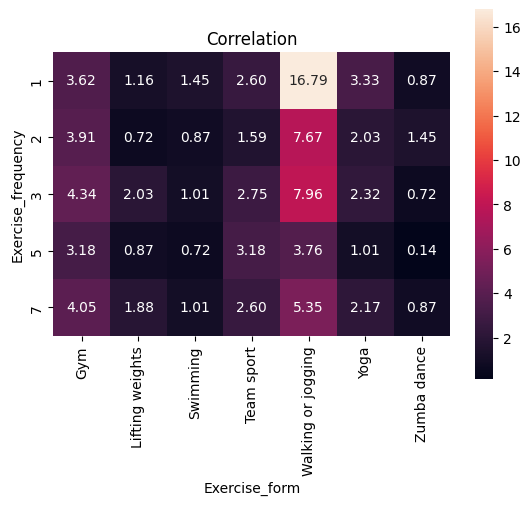

In [9]:
def mix(data, form, frequency, separator=';'):
  #將欄位分割
  isolated = data[form].str.split(separator, expand=True)
  #加上索引
  isolated.set_index(data[frequency], inplace=True)
    
  #推疊欄位
  stack_form = isolated.stack()
  stack_form = stack_form.droplevel(level=1)
  stack_form = stack_form.reset_index(name=form)
    
  #進行分組計算，得到form和frequency之間的統計結果，包括出現次數等
  groups = stack_form.groupby(by=[form, frequency]).size()
  groups = groups.reset_index(name='abs_Freq')

  #根據索引和欄位進行重塑
  relationship = groups.pivot(index=frequency, columns=form, values='abs_Freq')
    
  return relationship

#呼叫mix方法計算特徵之間的相關性
answer = mix(product_data, 'Exercise_form', 'Exercise_frequency')
#刪除離群值
answer.drop(columns=["I don't really exercise"], inplace=True)
answer.drop([0], inplace=True)
answer *= 100/answer.sum().sum() 
#繪製熱圖
sns.heatmap(answer, annot=True, fmt="0.2f", square=True).set(title='Correlation')

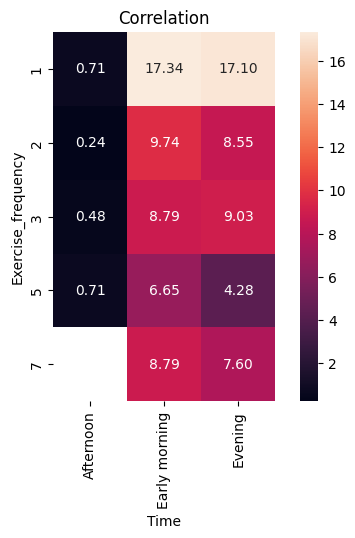

In [10]:
def mix(data, time, frequency, separator=';'):
  #將欄位分割
  isolated = data[time].str.split(separator, expand=True)
  #加上索引
  isolated.set_index(data[frequency], inplace=True)
    
  #推疊欄位
  stack_form = isolated.stack()
  stack_form = stack_form.droplevel(level=1)
  stack_form = stack_form.reset_index(name=time)
    
  #進行分組計算，得到Time和frequency之間的統計結果，包括出現次數等
  groups = stack_form.groupby(by=[time, frequency]).size()
  groups = groups.reset_index(name='abs_Freq')

  #根據索引和欄位進行重塑
  relationship = groups.pivot(index=frequency, columns=time, values='abs_Freq')
    
  return relationship

#呼叫mix方法計算特徵之間的相關性
answer = mix(product_data, 'Time', 'Exercise_frequency')
#刪除離群值
answer.drop([0], inplace=True)
answer *= 100/answer.sum().sum() 

#繪製熱圖
sns.heatmap(answer, annot=True, fmt="0.2f", square=True).set(title='Correlation');
